In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
centralAir = pd.DataFrame(houseData['CentralAir'])
salePrice = pd.DataFrame(houseData['SalePrice'])

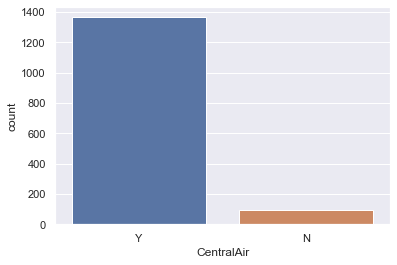

In [4]:
sb.countplot(centralAir["CentralAir"])

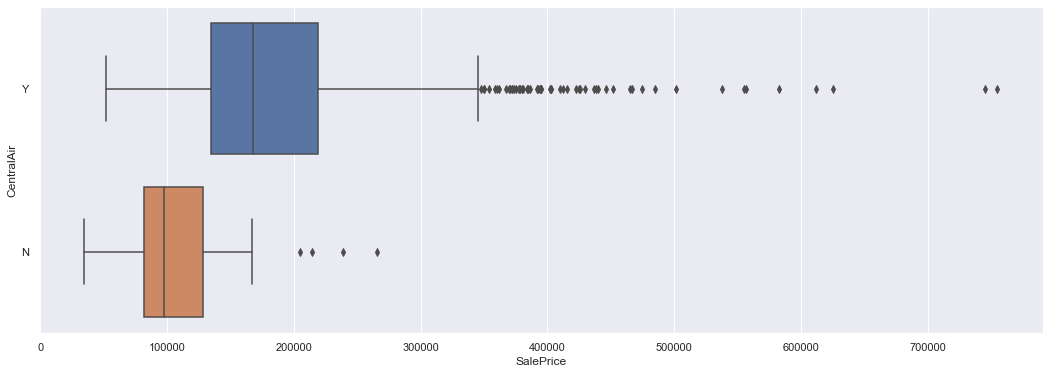

In [5]:
jointDF = pd.concat([salePrice, centralAir], axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

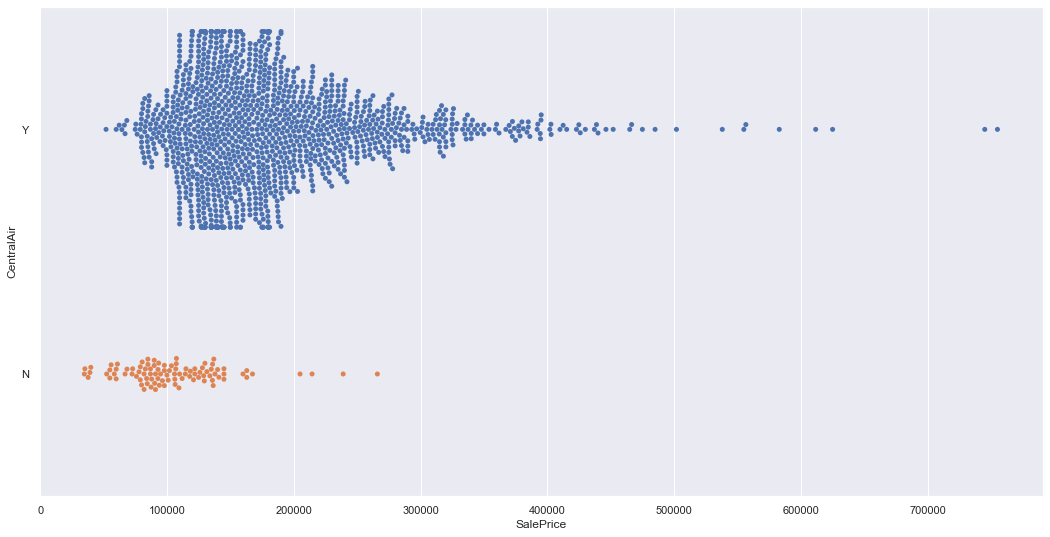

In [8]:
f, axes = plt.subplots(1, 1, figsize=(18, 9))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

In [7]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.model_selection import train_test_split
salePrice_train, salePrice_test, centralAir_train, centralAir_test = train_test_split(salePrice, centralAir, test_size = 360/1460)

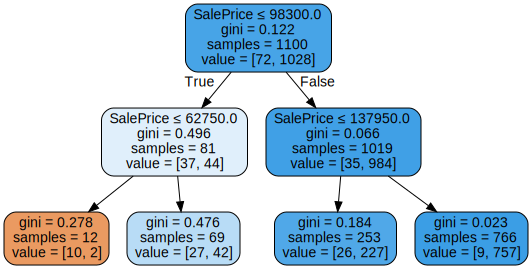

In [13]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(salePrice_train, centralAir_train)

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = salePrice_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Classification Accuracy for train set	: 0.9418181818181818
Classification Accuracy for test set	: 0.9416666666666667


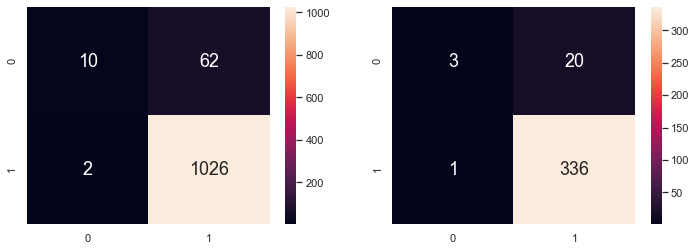

In [15]:
from sklearn.metrics import confusion_matrix

# Predict Central Air corresponding to Sale Price
centralAir_train_pred = dectree.predict(salePrice_train)
centralAir_test_pred = dectree.predict(salePrice_test)

# Print the Classification Accuracy
print("Classification Accuracy for train set\t:", dectree.score(salePrice_train, centralAir_train))
print("Classification Accuracy for test set\t:", dectree.score(salePrice_test, centralAir_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], axes.xlabel(''))
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy for train set	: 0.9363636363636364
Classification Accuracy for test set	: 0.9416666666666667


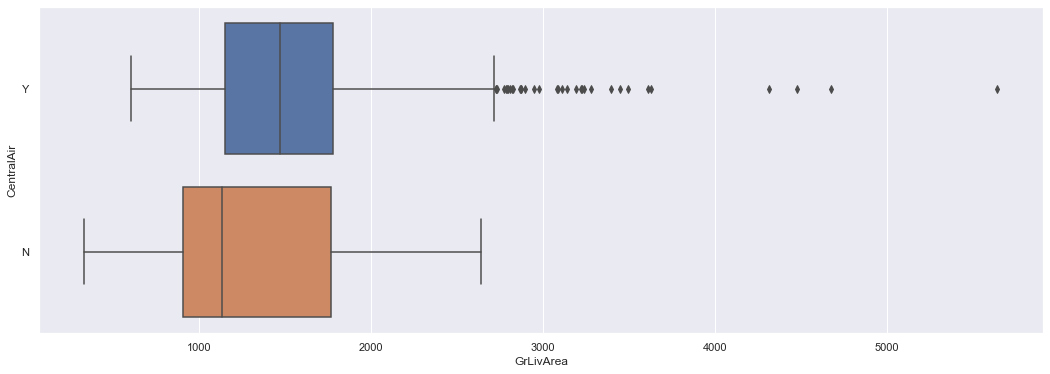

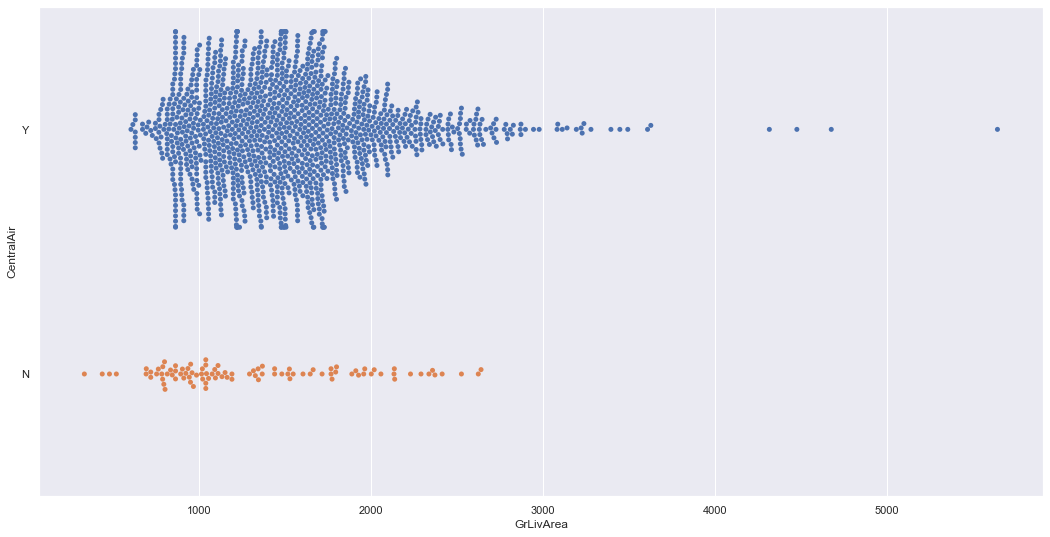

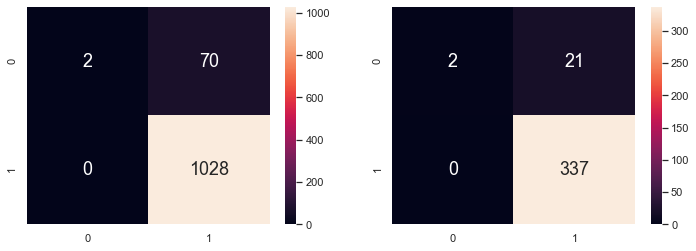

In [21]:
grLivArea = pd.DataFrame(houseData['GrLivArea'])

jointDF = pd.concat([grLivArea, centralAir], axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = jointDF, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 9))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = jointDF, orient = "h")

grLivArea_train, grLivArea_test, centralAir_train, centralAir_test = train_test_split(grLivArea, centralAir, test_size = 360/1460)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(grLivArea_train, centralAir_train)

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = grLivArea_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

# Predict Central Air corresponding to GrLivArea
centralAir_train_pred = dectree.predict(grLivArea_train)
centralAir_test_pred = dectree.predict(grLivArea_test)

# Print the Classification Accuracy
print("Classification Accuracy for train set\t:", dectree.score(grLivArea_train, centralAir_train))
print("Classification Accuracy for test set\t:", dectree.score(grLivArea_test, centralAir_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy for train set	: 0.9318181818181818
Classification Accuracy for test set	: 0.9472222222222222


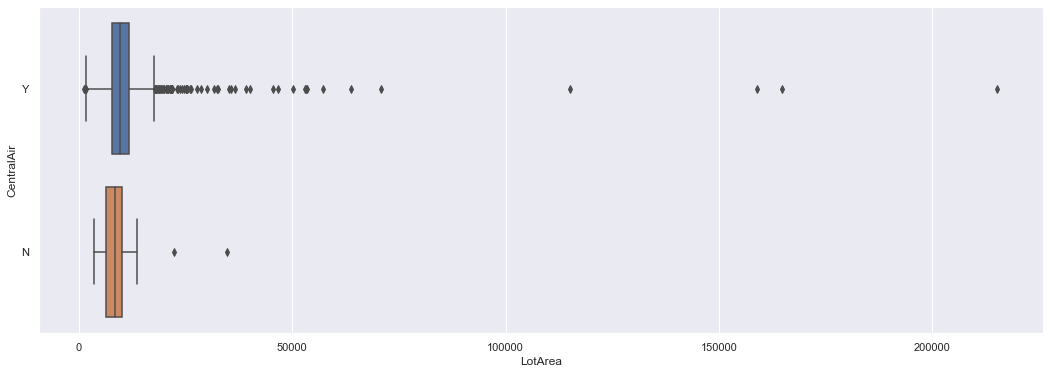

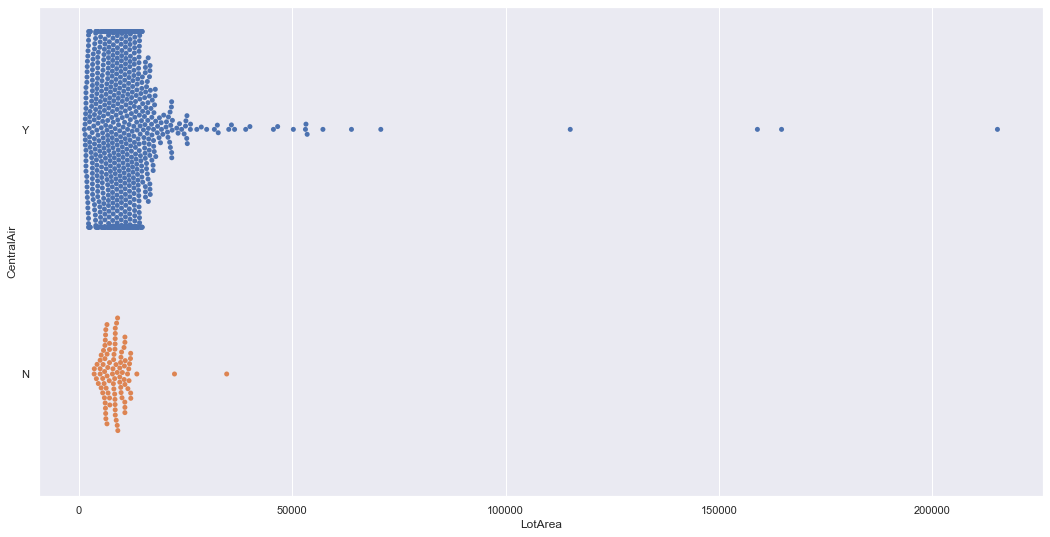

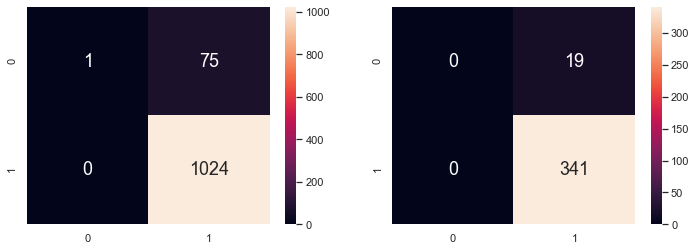

In [24]:
LotArea = pd.DataFrame(houseData['LotArea'])

jointDF = pd.concat([LotArea, centralAir], axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "LotArea", y = "CentralAir", data = jointDF, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 9))
sb.swarmplot(x = "LotArea", y = "CentralAir", data = jointDF, orient = "h")

LotArea_train, LotArea_test, centralAir_train, centralAir_test = train_test_split(LotArea, centralAir, test_size = 360/1460)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(LotArea_train, centralAir_train)

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = LotArea_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

# Predict Central Air corresponding to Lot Area
centralAir_train_pred = dectree.predict(LotArea_train)
centralAir_test_pred = dectree.predict(LotArea_test)

# Print the Classification Accuracy
print("Classification Accuracy for train set\t:", dectree.score(LotArea_train, centralAir_train))
print("Classification Accuracy for test set\t:", dectree.score(LotArea_test, centralAir_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy for train set	: 0.9372727272727273
Classification Accuracy for test set	: 0.9277777777777778


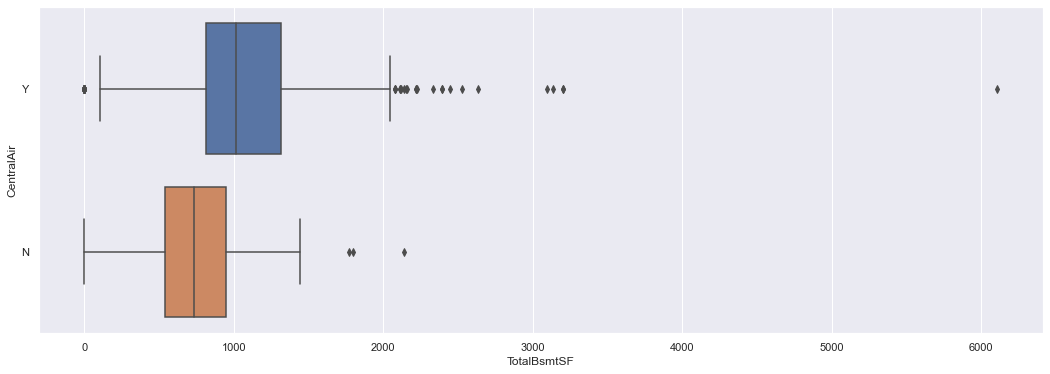

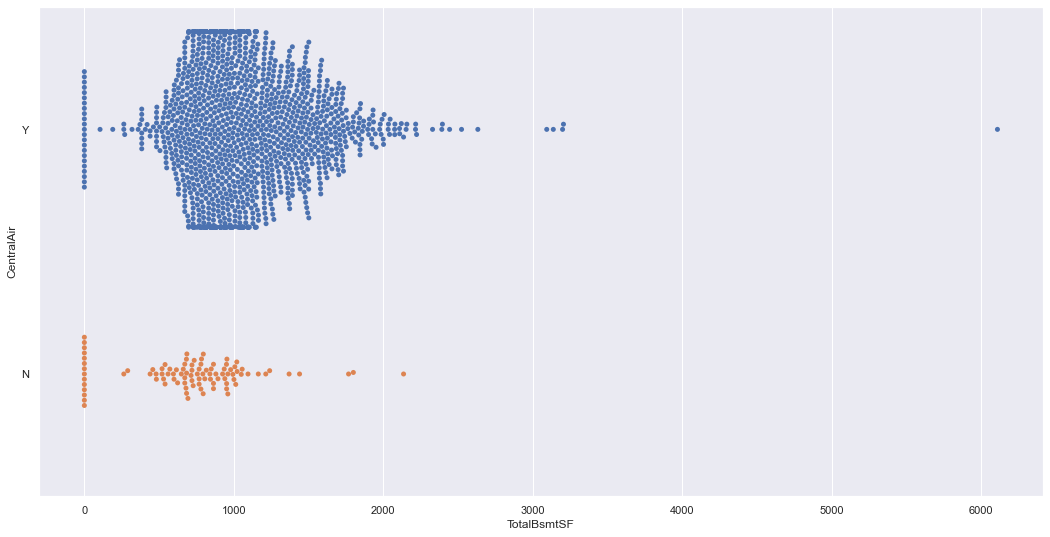

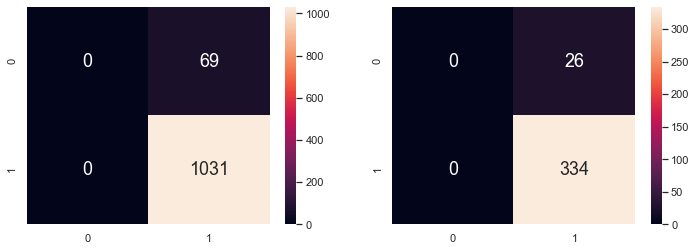

In [27]:
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])

jointDF = pd.concat([TotalBsmtSF, centralAir], axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "TotalBsmtSF", y = "CentralAir", data = jointDF, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 9))
sb.swarmplot(x = "TotalBsmtSF", y = "CentralAir", data = jointDF, orient = "h")

TotalBsmtSF_train, TotalBsmtSF_test, centralAir_train, centralAir_test = train_test_split(TotalBsmtSF, centralAir, test_size = 360/1460)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(TotalBsmtSF_train, centralAir_train)

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = TotalBsmtSF_train.columns,    # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

# Predict Central Air corresponding to TotalBsmtSF
centralAir_train_pred = dectree.predict(TotalBsmtSF_train)
centralAir_test_pred = dectree.predict(TotalBsmtSF_test)

# Print the Classification Accuracy
print("Classification Accuracy for train set\t:", dectree.score(TotalBsmtSF_train, centralAir_train))
print("Classification Accuracy for test set\t:", dectree.score(TotalBsmtSF_test, centralAir_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])